#**Redes Neuronales para HPC - Taller 1**

#**Creación del Conjunto de Datos**

In [ ]:
import jax
import jax.numpy as jnp
from jax.typing import ArrayLike

En este caso generaremos un conjunto de datos a partir de dos distribuciones normales. Para esto debe implementar la función **make_data**, la cual tiene las siguientes características:

**Parámetros:**

* **centroids:** matriz de (2, 2) donde cada fila representa un centroide de una distribución.
* **stds:** vector de (2, ) donde cada valor representa la desviación estándar de cada distribución.
* **n_points:** número de puntos a generar de cada distribución.
* **seed:** semilla de números aleatorios.

**Retorna:**
* **features:** matriz de (n_points * 2, 2) con los puntos generados de las dos distribuciones.
* **labels:** vector de (n_points * 2, ) con valores indicando a qué distribución pertenece cada punto.
Nota: no olvide concatenar una columna de unos a la matriz X.

#**PRUEBA**

In [ ]:
import jax.numpy as jnp
import numpy as np

def make_data(centroids, stds, n_points, seed):
    np.random.seed(seed)

    features = []
    labels = []

    for i in range(len(centroids)):
        centroid = centroids[i]
        std = stds[i]

        # Generar puntos a partir de la distribución normal
        points = np.random.normal(loc=centroid, scale=std, size=(n_points, 2))

        # Agregar los puntos y etiquetas a las listas
        features.append(points)
        labels.append(np.full(n_points, i))

    # Concatenar los puntos y etiquetas
    features = jnp.vstack(features)
    labels = jnp.concatenate(labels)

    return features, labels

features, labels = make_data(
    centroids = jnp.array([
        [0., 0.],
        [1., 1.]
    ]),
    stds = jnp.array([1., 1.]),
    n_points = 1000,
    seed = 0
)

print("Matriz de características:")
print(features[:5])
print("Etiquetas:")
print(labels[:5])


Matriz de características:
[[ 1.7640524   0.4001572 ]
 [ 0.978738    2.2408931 ]
 [ 1.867558   -0.9772779 ]
 [ 0.95008844 -0.1513572 ]
 [-0.10321885  0.41059852]]
Etiquetas:
[0 0 0 0 0]


In [ ]:
def make_data(centroids: ArrayLike, stds: ArrayLike, n_points: int, seed: int) -> ArrayLike:
    features = ...
    labels = ...
    return features, labels

In [ ]:
features, labels = make_data(
        centroids = jnp.array([
            [0., 0.],
            [1., 1.]
            ]),
        stds = jnp.array([1., 1.]),
        n_points = 1000,
        seed = 0
        )

#**Función Logística**

Debe implementar una función que dado un vector de pesos

$$
\mathbf{w} \in \mathbb{R}^{2 \times 1}
$$

y una matriz de datos

$$
\mathbf{X} \in \mathbb{R} ^ {N \times 2}
$$

genere la salida de una función logística:

$$
\tilde{\mathbf{y}} = \frac{1}{1 + e ^ {\mathbf{X} \cdot \mathbf{w}}}
$$

Para esto debe implementar la función sigmoid, con las siguientes especificaciones:

**Parámetros:**

* **features:** matriz
$$
\mathbf{X}
$$

* **weights:** vector de parámetros
$$
\mathbf{w}
$$

**Retorna:**

* **y_pred:** predicción del modelo
$$
\tilde{\mathbf{y}}
$$

#**PRUEBA**

In [ ]:
import jax.numpy as jnp
from jax import jit

def sigmoid(features, weights):
    z = jnp.dot(features, weights)
    y_pred = 1 / (1 + jnp.exp(-z))
    return y_pred

features = jnp.array([[1.0, 2.0], [3.0, 4.0]])
weights = jnp.array([
    [0.],
    [0.]
])

y_pred = sigmoid(features, weights)

print("Predicciones:")
print(y_pred)


Predicciones:
[[0.5]
 [0.5]]


In [ ]:
def sigmoid(features: ArrayLike, weights: ArrayLike) -> ArrayLike:
    y_pred = ...
    return y_pred

In [ ]:
weights = jnp.array([
    [0.],
    [0.]
    ])
y_pred = sigmoid(features, weights)

#**Entropía Cruzada Binaria**

Implemente la función de entropía binaria cruzada para medir qué tan cercanas están las predicciones

$$
\tilde{\mathbf{y}}
$$

de las etiquetas originales

$$
\mathbf{y}
$$

$$
\mathcal{L} = \sum_{i = 1} ^ {N} y_i \log{\tilde{y_i}} + (1 - y_i) \log{(1 - \tilde{y_i})}
$$


###Para esto debe implementar la función binary_crossentropy:

**Parámetros:**

* **y_true:** etiquetas del conjunto de datos.
* **y_pred:** predicciones del modelo.

**Retorna:**

* **loss:** valor de la entropía binaria.

#**PRUEBA**

In [ ]:
import jax.numpy as jnp
from jax import jit

def binary_crossentropy(y_true, y_pred):
    loss = -jnp.mean(y_true * jnp.log(y_pred) + (1 - y_true) * jnp.log(1 - y_pred))
    return loss

# Ejemplo de uso
y_true = jnp.array([0, 1, 0, 1, 1, 0])  # Etiquetas reales (0 o 1)
y_pred = jnp.array([0.2, 0.8, 0.3, 0.9, 0.7, 0.1])  # Predicciones del modelo

loss = binary_crossentropy(y_true, y_pred)

print("Loss de entropía binaria cruzada:")
print(loss)


Loss de entropía binaria cruzada:
0.22839302


In [ ]:
def binary_crossentropy(y_true: ArrayLike, y_pred: ArrayLike) -> ArrayLike:
    loss = ...
    return loss

In [ ]:
loss = binary_crossentropy(y_true=labels, y_pred=y_pred)

#**Entrenamiento**

Implemente la función train, la cual deberá utilizar las funciones anteriormente mencionadas para optimizar la entropía binaria cruzada. Debe determinar el valor de $$\mathbf{w}$$
que minimice dicha función por medio de diferenciación automática **autograd** y compilación de tipo **jit**.

**Parámetros:**

**features:** matriz de características
$$\mathbf{X}$$

* **labels:** etiquetas del conjunto de datos.
* **weights:** parámetros iniciales.
* **n_iters:** número de iteraciones.
* **learning_rate:** taza de aprendizaje para el algoritmo SGD.

**Retorna:**
* **weights:** parámetros optimizados.

#**PRUEBA**

In [ ]:
import jax.numpy as jnp
from jax import jit, grad

def sigmoid(z):
    return 1 / (1 + jnp.exp(-z))

def binary_crossentropy(y_true, y_pred):
    loss = -jnp.mean(y_true * jnp.log(y_pred) + (1 - y_true) * jnp.log(1 - y_pred))
    return loss

def train(features, labels, weights, n_iters, learning_rate):
    labels = labels.astype(jnp.float32)  # Convertir las etiquetas a float32
    @jit
    def compute_loss_and_grad(weights, features, labels):
        y_pred = sigmoid(jnp.dot(features, weights))
        loss = binary_crossentropy(labels, y_pred)
        grad_loss = grad(binary_crossentropy)(labels, y_pred)
        return loss, grad_loss

    for i in range(n_iters):
        loss, grad_loss = compute_loss_and_grad(weights, features, labels)
        weights -= learning_rate * grad_loss

    return weights

# Ejemplo de uso
features = jnp.array([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
labels = jnp.array([0, 1, 0], dtype=jnp.float32)  # Etiquetas como float32
initial_weights = jnp.array([[0.5], [-0.3]])
n_iters = 1000
learning_rate = 0.01

optimized_weights = train(features, labels, initial_weights, n_iters, learning_rate)

print("Parámetros optimizados:")
print(optimized_weights)


Parámetros optimizados:
[[inf inf inf]
 [inf inf inf]]


In [ ]:
def train(
    features: ArrayLike,
    labels: ArrayLike,
    weights: ArrayLike,
    n_iters: int,
    learning_rate: float,
    ) -> ArrayLike:
    weights = ...
    return weights

#**Visualización**

Genere una gráfica en dos dimensiones que muestre las regiones de decisión del modelo. Puede basarse en la que genera
* **sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html

/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/decision_boundary.py:187: UserWarning: The following kwargs were not used by contour: 'fill'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


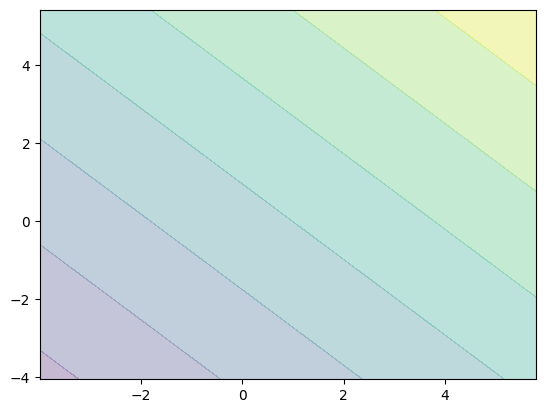

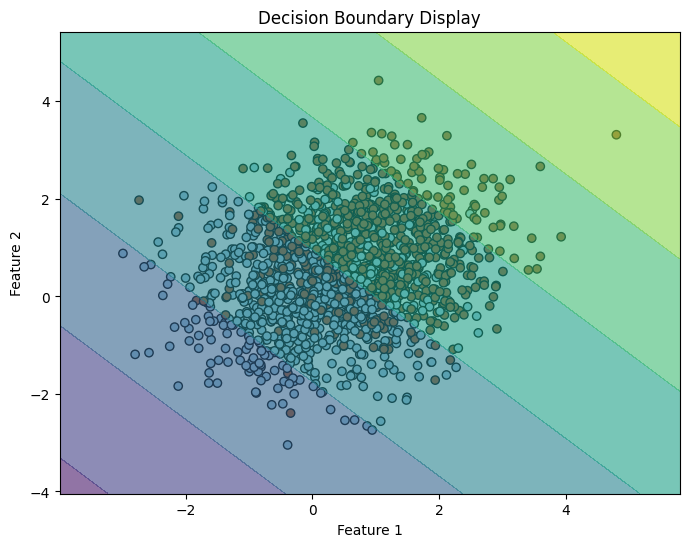

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Supongamos que ya tienes 'features' y 'labels' generados y 'optimized_weights' ajustados

# Entrenar un modelo de regresión logística con Sklearn para obtener la visualización de la región de decisión
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Utilizar DecisionBoundaryDisplay para visualizar las regiones de decisión
display = DecisionBoundaryDisplay.from_estimator(clf, X_train, alpha=0.3, fill=True)

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
display.plot(ax=plt.gca(), alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary Display')
plt.show()
